In [1]:
import pm4py
log_all = pm4py.read_xes('BPI_Challenge_2019.xes')

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 251734/251734 [02:58<00:00, 1408.00it/s]


In [2]:
last_timestamp = max(event["time:timestamp"] for trace in log_all for event in trace)
print("Last Timestamp:", last_timestamp)
first_timestamp = min(event["time:timestamp"] for trace in log_all for event in trace)
print("First Timestamp:", first_timestamp)

time_filtered_log = pm4py.filter_time_range(log_all, "2018-09-01 00:00:00", "2018-12-01 00:00:00", mode='traces_contained')

Last Timestamp: 2020-04-09 21:59:00+00:00
First Timestamp: 1948-01-26 22:59:00+00:00


In [3]:
print(f'activities: {list(pm4py.get_event_attribute_values(time_filtered_log,"concept:name").keys())}')
print("Number of different trace variants: ", len(pm4py.get_variants_as_tuples(time_filtered_log)))

activities: ['Create Purchase Order Item', 'Delete Purchase Order Item', 'Vendor creates invoice', 'Record Goods Receipt', 'Record Invoice Receipt', 'Clear Invoice', 'Remove Payment Block', 'Cancel Goods Receipt', 'Change Quantity', 'Vendor creates debit memo', 'Cancel Invoice Receipt', 'Change Price', 'Receive Order Confirmation', 'Change Storage Location', 'Change Delivery Indicator', 'Block Purchase Order Item', 'Create Purchase Requisition Item', 'Reactivate Purchase Order Item', 'Record Service Entry Sheet', 'SRM: Created', 'SRM: Complete', 'SRM: Awaiting Approval', 'SRM: Document Completed', 'SRM: Ordered', 'SRM: In Transfer to Execution Syst.', 'SRM: Change was Transmitted', 'SRM: Deleted', 'SRM: Transaction Completed', 'Cancel Subsequent Invoice', 'Change Approval for Purchase Order', 'Release Purchase Order', 'Update Order Confirmation', 'Record Subsequent Invoice', 'Change payment term', 'Change Final Invoice Indicator', 'Set Payment Block']
Number of different trace variants

In [4]:
len(time_filtered_log)

26205

In [5]:
from exdpn.petri_net import get_petri_net
log = pm4py.filter_event_attribute_values(
    time_filtered_log,
    "concept:name",
    ['Create Purchase Order Item', 'Vendor creates invoice', 'Record Goods Receipt', 'Record Invoice Receipt', 
    'Clear Invoice', 'Record Service Entry Sheet', 'Cancel Goods Receipt', 
    'Vendor creates debit memo', 'Cancel Invoice Receipt', 'Change Delivery Indicator', 'Remove Payment Block', 
    'Change Price', 'Delete Purchase Order Item', 'Change Quantity', 
    'Change Final Invoice Indicator', 'Receive Order Confirmation', 'Cancel Subsequent Invoice', 
    'Reactivate Purchase Order Item', 'Update Order Confirmation', 'Block Purchase Order Item', 
    'Change Approval for Purchase Order', 'Release Purchase Order', 'Record Subsequent Invoice', 'Set Payment Block', 
    'Create Purchase Requisition Item', 'Change Storage Location', 'Change Currency', 'Change payment term', 
    'Change Rejection Indicator', 'Release Purchase Requisition'],
    level="event",
    retain=True)

print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(log)))



Number of different trace variants - subtraces:  1535


In [6]:
log_start = pm4py.get_start_activities(log)
print(log_start)
filtered_log = pm4py.filter_start_activities(log, 'Create Purchase Order Item')
print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(filtered_log)))

end_activities = pm4py.get_end_activities(log)
print(end_activities)
filtered_log = pm4py.filter_end_activities(log, ["Clear Invoice"])

print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(filtered_log)))

{'Create Purchase Order Item': 11176, 'Vendor creates invoice': 347, 'Vendor creates debit memo': 3, 'Create Purchase Requisition Item': 14665, 'Release Purchase Order': 1, 'Change Approval for Purchase Order': 13}
Number of different trace variants - subtraces:  959
{'Delete Purchase Order Item': 1850, 'Clear Invoice': 10521, 'Create Purchase Order Item': 1521, 'Cancel Goods Receipt': 175, 'Record Goods Receipt': 4576, 'Record Invoice Receipt': 5316, 'Receive Order Confirmation': 123, 'Change Delivery Indicator': 104, 'Block Purchase Order Item': 17, 'Record Service Entry Sheet': 401, 'Change Approval for Purchase Order': 211, 'Change Quantity': 107, 'Change Storage Location': 15, 'Change Price': 48, 'Remove Payment Block': 1187, 'Release Purchase Order': 1, 'Change payment term': 1, 'Cancel Subsequent Invoice': 4, 'Cancel Invoice Receipt': 1, 'Record Subsequent Invoice': 1, 'Vendor creates invoice': 23, 'Update Order Confirmation': 1, 'Set Payment Block': 1}
Number of different trace

In [7]:
# We discard less frequent variants in order to reduce
# the number of edge cases.
log = pm4py.filter_variants_top_k(filtered_log, 10)

pm4py.write_xes(log, "BPI_Challenge_2019_filtered_top_k.xes")
len(log)

exporting log, completed traces :: 100%|██████████| 8345/8345 [00:04<00:00, 1828.38it/s]


8345

### Analysis

In [1]:
import pm4py
log = pm4py.read_xes("BPI_Challenge_2019_filtered_top_k.xes")

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 8345/8345 [00:07<00:00, 1112.14it/s]


In [2]:
from exdpn.petri_net import get_petri_net
net, im, fm = get_petri_net(log, miner_type='IM')

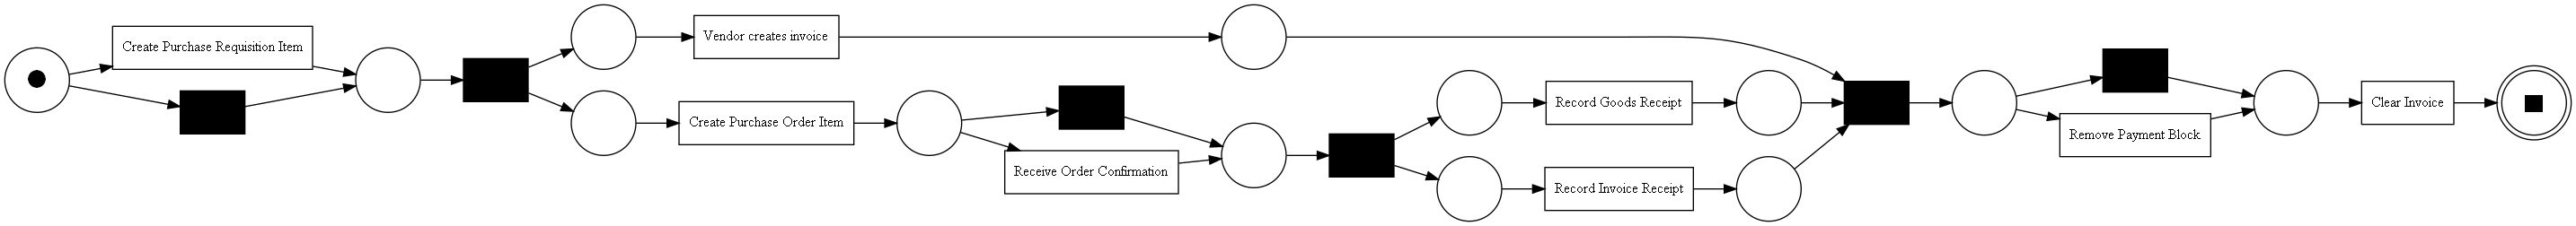

In [3]:
pm4py.view_petri_net(net, im, fm)

In [4]:
event_attrs = list(pm4py.get_event_attributes(log))
trace_attrs = list(pm4py.get_trace_attributes(log))

In [5]:
event_attrs = [attr for attr in event_attrs if max(list(pm4py.get_event_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
event_attrs.remove("time:timestamp")
event_attrs.remove("org:resource")
event_attrs.remove("User")
event_attrs

['Cumulative net worth (EUR)', 'concept:name']

In [6]:
trace_attrs = [attr for attr in trace_attrs if max(list(pm4py.get_trace_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
trace_attrs.remove("Name")
trace_attrs.remove("Item")
trace_attrs.remove("Purchasing Document")
trace_attrs

['GR-Based Inv. Verif.',
 'Item Category',
 'Item Type',
 'Document Type',
 'Goods Receipt',
 'Purch. Doc. Category name',
 'Spend area text',
 'Spend classification text',
 'Source',
 'Company',
 'Vendor',
 'Sub spend area text']

### Without hyperparameter:

In [9]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.RF, ML_Technique.SVM, ML_Technique.NN]#, ML_Technique.XGB]

dpn = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     ml_list=ml_list, 
                     verbose=True, 
                     impute=True,
                     CV_splits = 3, 
                     hyperparameters={ML_Technique.NN: {},
                                      ML_Technique.DT: {},
                                      ML_Technique.LR: {},
                                      ML_Technique.SVM: {},
                                      ML_Technique.RF: {}#,
                                      #ML_Technique.XGB: {}
                                      })

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_4'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done
-> Evaluating guards at decision point 'p_9'... Done
-> Evaluating guards at decision point 'source'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done


In [10]:
best = dpn.get_best()

-> Best machine learning technique at decision point 'p_4': Logistic Regression w/ performance 0.9447129449702562
-> Best machine learning technique at decision point 'p_9': Neural Network w/ performance 1.0
-> Best machine learning technique at decision point 'source': Support Vector Machine w/ performance 0.9374329666105784


In [11]:
import pandas as pd

res = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn.guard_manager_per_place.items():
    res_row = {"place":dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res = res.append([res_row])

res['place'] = res['place'].apply(str)
res.index = res["place"]
res.drop(["place"], axis=1, inplace=True)
res.dropna(axis=1, how="all", inplace=True)

In [12]:
res.transpose()

place,p_4,p_9,source
Decision Tree,0.769803,0.994653,0.808994
Logistic Regression,0.811447,0.993456,0.820810
Random Forest,0.787369,0.986827,0.840962
Support Vector Machine,0.797244,0.976200,0.847226
Neural Network,0.787975,0.995158,0.839272


### Hyperparameter Selection

In [13]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
from exdpn.petri_net import get_petri_net
from exdpn.guard_datasets import extract_all_datasets
from exdpn.data_preprocessing import basic_data_preprocessing
from exdpn.data_preprocessing.data_preprocessing import apply_ohe, apply_scaling, fit_scaling, fit_ohe
from exdpn.guards import ML_Technique

# prepare data
dp_dataset_map = extract_all_datasets(log= log, net=net, initial_marking=im, final_marking=fm, 
                                      event_level_attributes = event_attrs,
                                      case_level_attributes=trace_attrs)

# decision points 
dps = list(dp_dataset_map.keys())

#### Cross-Validation Decision Tree (with respect to explainablility)

We have observed that decision trees tend to be enormously large without any hyperparameters. We thus try to find an optimal `min_impurity_decrease` value.

In [14]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_impurity_decrease':(0, 0.01, 0.05, 0.1, 0.15)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    dt_base = DecisionTreeClassifier()
    dt_grid = GridSearchCV(dt_base, parameters, n_jobs=-1, scoring='f1_weighted')

    dt_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(dt_grid.best_score_,4)}\t {dt_grid.best_params_}")
    best_values[dp] = dt_grid.best_params_['min_impurity_decrease']

min_impurity_decrease = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {min_impurity_decrease}")

p_4:	0.8753	 {'min_impurity_decrease': 0.01}
p_9:	0.9952	 {'min_impurity_decrease': 0.01}
source:	0.8654	 {'min_impurity_decrease': 0}
final value: 0.006666666666666667


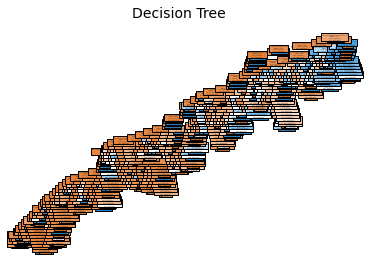

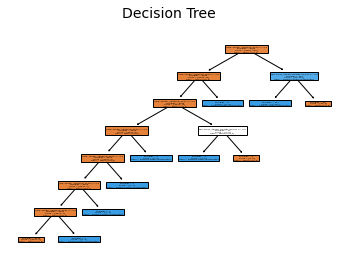

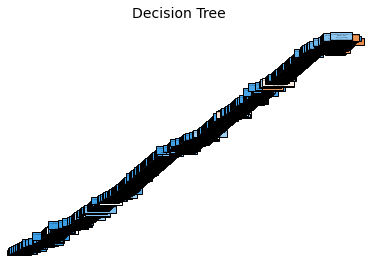

In [15]:
# decision tree without hyperparameter
for p in dps:
    dpn_temp = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                              event_level_attributes=event_attrs,
                              case_level_attributes=trace_attrs,
                              ml_list=[ML_Technique.DT], 
                              verbose=False, 
                              impute=True,
                              hyperparameters = {ML_Technique.DT: {}})
    dt_guard = dpn_temp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    rep = dt_guard.get_explainable_representation()

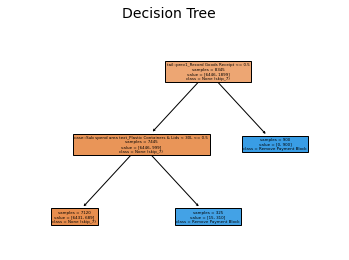

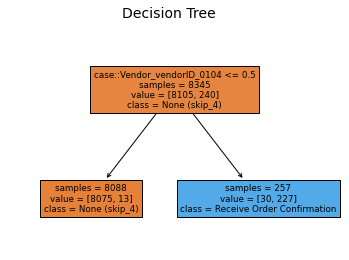

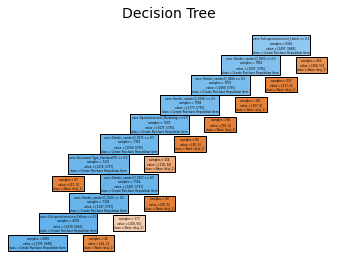

In [16]:
# decision tree with hyperparameter
for p in dps:
    dpn_temp = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                              event_level_attributes=event_attrs,
                              case_level_attributes=trace_attrs,
                              ml_list=[ML_Technique.DT], 
                              verbose=False, 
                              impute=True,
                              hyperparameters = {ML_Technique.DT: {'min_impurity_decrease': min_impurity_decrease}})
    dt_guard = dpn_temp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    rep = dt_guard.get_explainable_representation()

#### Cross-Validaion Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier
parameters = {'hidden_layer_sizes': ((5, ), (5, 5), (10, 10), (5, 10, 5))}

best_values = {}
max_ds_size = -1
max_ds_key = None

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    if len(dp_dataset) > max_ds_size: max_ds_key = dp
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    nn_base = MLPClassifier()
    nn_grid = GridSearchCV(nn_base, parameters, n_jobs=-1, scoring='f1_weighted')

    nn_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(nn_grid.best_score_,4)}\t {nn_grid.best_params_}")
    best_values[dp] = nn_grid.best_params_['hidden_layer_sizes']

hidden_layer_sizes = best_values[max_ds_key]
print(f"final value: {hidden_layer_sizes}")

p_4:	0.8281	 {'hidden_layer_sizes': (10, 10)}
p_9:	0.998	 {'hidden_layer_sizes': (5, 10, 5)}
source:	0.8642	 {'hidden_layer_sizes': (5, 10, 5)}
final value: (5, 10, 5)


#### Cross-Validation Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': (0.1, 0.25)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    lr_base = LogisticRegression()
    lr_grid = GridSearchCV(lr_base, parameters, n_jobs=-1, scoring='f1_weighted')

    lr_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(lr_grid.best_score_,4)}\t {lr_grid.best_params_}")
    best_values[dp] = lr_grid.best_params_['C']

C_lr = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_lr}")

p_4:	0.8525	 {'C': 0.1}
p_9:	0.998	 {'C': 0.1}
source:	0.8112	 {'C': 0.25}
final value: 0.15


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#### Cross-Validation SVM:

In [19]:
from sklearn.svm import LinearSVC
parameters = {'C':(0.1, 0.25)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    svm_base = LinearSVC()
    svm_grid = GridSearchCV(svm_base, parameters, n_jobs=-1, scoring='f1_weighted')

    svm_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(svm_grid.best_score_,4)}\t {svm_grid.best_params_}")
    best_values[dp] = svm_grid.best_params_['C']

C_svm = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_svm}")

p_4:	0.8364	 {'C': 0.1}
p_9:	0.9983	 {'C': 0.25}
source:	0.8659	 {'C': 0.25}
final value: 0.2


#### Cross-Validation XGBoost:

In [25]:
from xgboost import XGBClassifier
parameters = {'max_depth': (1, 3, 5, 10)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    xgb_base = XGBClassifier()
    xgb_grid = GridSearchCV(xgb_base, parameters, n_jobs=-1, scoring='f1_weighted')

    xgb_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(xgb_grid.best_score_,4)}\t {xgb_grid.best_params_}")
    best_values[dp] = xgb_grid.best_params_['max_depth']

max_depth_xgb = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {max_depth_xgb}")

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\sklearn.py", line 1382, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\sklearn.py", line 401, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\sklearn.py", line 1396, in <lambda>
    create_dmatrix=lambda **kwargs: DMatrix(nthread=self.n_jobs, **kwargs),
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\core.py", line 666, in __init__
    self.feature_names = feature_names
  File "c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\xgboost\core.py", line 1044, in feature_names
    raise ValueError('feature_names must be string, and may not contain [, ] or <')
ValueError: feature_names must be string, and may not contain [, ] or <


#### Cross-Validation Random Forest:

In [20]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': (10, 20, 50)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    rf_base = RandomForestClassifier()
    rf_grid = GridSearchCV(rf_base, parameters, n_jobs=-1, scoring='f1_weighted')

    rf_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(rf_grid.best_score_,4)}\t {rf_grid.best_params_}")
    best_values[dp] = rf_grid.best_params_['n_estimators']

n_estimators = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {n_estimators}")

p_4:	0.8122	 {'n_estimators': 10}
p_9:	0.9988	 {'n_estimators': 50}
source:	0.8643	 {'n_estimators': 20}
final value: 27


### With hyperparameter:

In [21]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.NN, ML_Technique.SVM, ML_Technique.RF]#, ML_Technique.XGB]

dpn_hp = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     ml_list=ml_list, 
                     verbose=True, 
                     impute=True,
                     CV_splits = 3,
                     hyperparameters = {ML_Technique.NN: {'hidden_layer_sizes': hidden_layer_sizes}, 
                                        ML_Technique.DT: {'min_impurity_decrease': min_impurity_decrease},
                                        ML_Technique.LR: {"C": C_lr},
                                        ML_Technique.SVM: {"C": C_svm},
                                        #ML_Technique.XGB: {"max_depth": max_depth_xgb},
                                        ML_Technique.RF: {'n_estimators': n_estimators,
                                                         'min_impurity_decrease': min_impurity_decrease}})

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_4'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

Done
-> Evaluating guards at decision point 'p_9'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'source'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

Done


In [22]:
best_hp = dpn_hp.get_best()

-> Best machine learning technique at decision point 'p_4': Logistic Regression w/ performance 0.933555198322333
-> Best machine learning technique at decision point 'p_9': Logistic Regression w/ performance 0.9986658249152924
-> Best machine learning technique at decision point 'source': Neural Network w/ performance 0.9404945534464434


In [23]:
res_hp = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn_hp.guard_manager_per_place.items():
    res_row = {"place": dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res_hp = res_hp.append([res_row])
    
res_hp['place'] = res_hp['place'].apply(str)
res_hp.index = res_hp["place"]
res_hp.drop(["place"], axis=1, inplace=True)
res_hp.dropna(axis=1, how="all", inplace=True)

res_hp.transpose()

place,p_4,p_9,source
Decision Tree,0.817534,0.995109,0.703369
Logistic Regression,0.825450,0.997281,0.748698
Neural Network,0.810203,0.995868,0.841974
Support Vector Machine,0.784532,0.976079,0.814828
Random Forest,0.677736,0.957070,0.577490


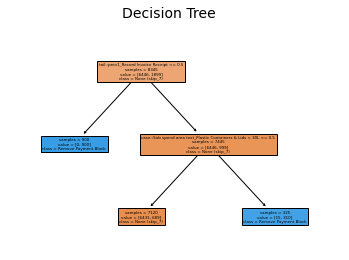

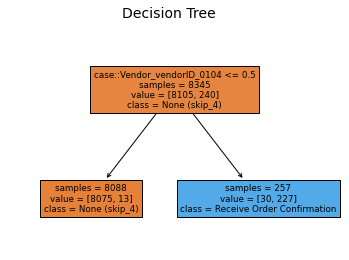

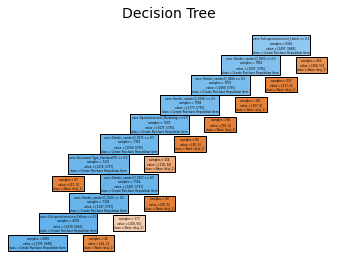

In [24]:
dps_hp = list(dpn_hp.decision_points)
for p in dps_hp:
    dt_guard = dpn_hp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

#### Summary:

In [25]:
res.transpose()

place,p_4,p_9,source
Decision Tree,0.769803,0.994653,0.808994
Logistic Regression,0.811447,0.993456,0.820810
Random Forest,0.787369,0.986827,0.840962
Support Vector Machine,0.797244,0.976200,0.847226
Neural Network,0.787975,0.995158,0.839272


In [26]:
res_hp.transpose()

place,p_4,p_9,source
Decision Tree,0.817534,0.995109,0.703369
Logistic Regression,0.825450,0.997281,0.748698
Neural Network,0.810203,0.995868,0.841974
Support Vector Machine,0.784532,0.976079,0.814828
Random Forest,0.677736,0.957070,0.577490
